In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from gensim.models.word2vec import Word2Vec

In [3]:
from collections import OrderedDict

models = OrderedDict([
    (year, Word2Vec.load('models/criticism/{}.bin'.format(year)))
    for year in range(1820, 1940, 20)
])

In [4]:
def cosine_series(anchor, query):
    
    series = OrderedDict()
    
    for year, model in models.items():
        
        series[year] = (
            model.similarity(anchor, query)
            if query in model else 0
        )

    return series

In [5]:
import numpy as np
import statsmodels.api as sm

def lin_reg(series):

    x = np.array(list(series.keys()))
    y = np.array(list(series.values()))

    x = sm.add_constant(x)

    return sm.OLS(y, x).fit()

In [6]:
def plot_cosine_series(anchor, query, w=5, h=4):
    
    series = cosine_series(anchor, query)
    
    fit = lin_reg(series)

    x1 = list(series.keys())[0]
    x2 = list(series.keys())[-1]

    y1 = fit.predict()[0]
    y2 = fit.predict()[-1]
    
    print(query)
    
    plt.figure(figsize=(w, h))
    plt.ylim(0, 1)
    plt.title(query)
    plt.xlabel('Year')
    plt.ylabel('Similarity')
    plt.plot(list(series.keys()), list(series.values()))
    plt.plot([x1, x2], [y1, y2], color='gray', linewidth=0.5)
    plt.show()

poésie


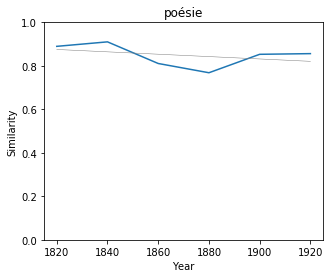

In [7]:
plot_cosine_series('littérature', 'poésie')
# plot_cosine_series('littérature', 'fiction')
# plot_cosine_series('littérature', 'polite')

In [8]:
def union_neighbor_vocab(anchor, topn=200):
    
    vocab = set()
    
    for year, model in models.items():
        similar = model.most_similar(anchor, topn=topn)
        vocab.update([s[0] for s in similar])
        
    return vocab

In [10]:
union_vocab = union_neighbor_vocab('littérature')

In [11]:
data = []
for token in union_vocab:
    
    series = cosine_series('littérature', token)
    fit = lin_reg(series)
    
    data.append((token, fit.params[1], fit.pvalues[1]))

In [12]:
import pandas as pd

df1 = pd.DataFrame(data, columns=('token', 'slope', 'p'))

# Increasing

In [13]:
pd.set_option('display.max_rows', 1000)

df1.sort_values('slope', ascending=False).head(50)

,token,slope,p
514,sociologie,0.006982,0.027157
152,relativité,0.006692,0.020038
107,mentalité,0.006446,0.051619
384,revision,0.006440,0.005977
175,hégémonie,0.006437,0.010990
122,parité,0.006252,0.010762
99,évolution,0.006231,0.009315
33,biologie,0.006191,0.003644
81,méconnaissance,0.006169,0.003273
427,réapparition,0.005939,0.008566


sociologie


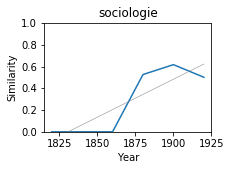

relativité


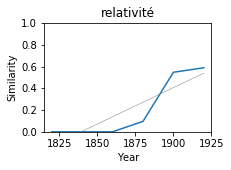

mentalité


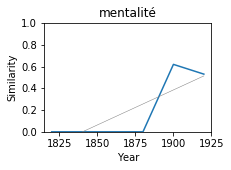

revision


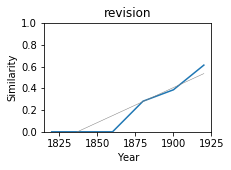

hégémonie


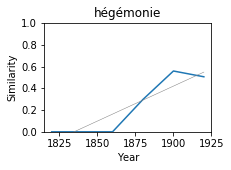

parité


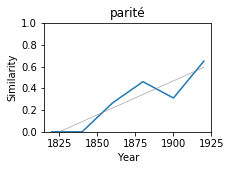

évolution


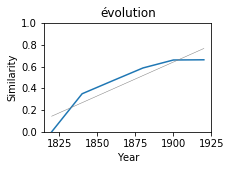

biologie


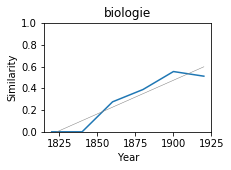

méconnaissance


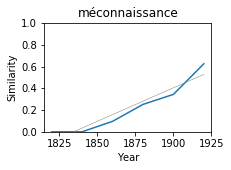

réapparition


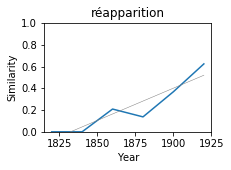

bibliographie


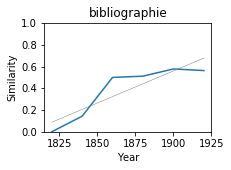

technique


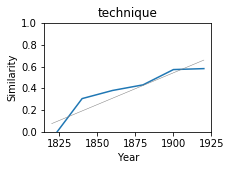

machinisme


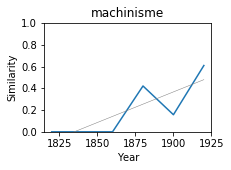

documentation


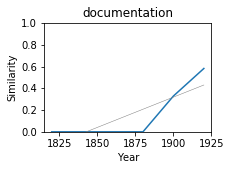

figuration


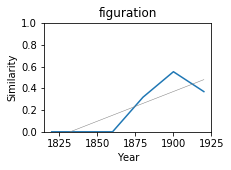

phonétique


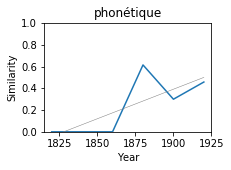

coopérer


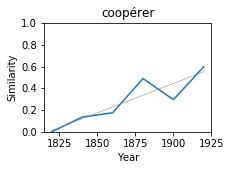

utilisation


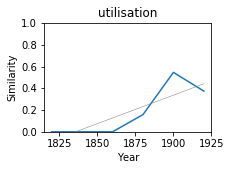

notation


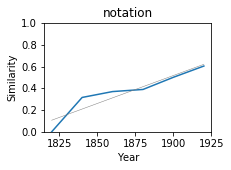

orphelinat


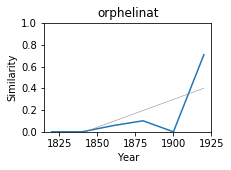

In [14]:
for i, row in df1.sort_values('slope', ascending=False).head(20).iterrows():
    plot_cosine_series('littérature', row['token'], 3, 2)

# Decreasing

In [15]:
df1.sort_values('slope', ascending=True).head(50)

,token,slope,p
120,terminons,-0.006706,0.013985
112,restaurateurs,-0.005928,0.057841
354,codex,-0.005906,0.120764
235,rené,-0.005778,0.086498
17,transplantation,-0.005678,0.158302
348,mésopotamie,-0.005526,0.149560
143,jérome,-0.005359,0.158318
389,enchanteresse,-0.005262,0.036792
323,satiété,-0.005253,0.005866
502,confirma,-0.005026,0.076168


terminons


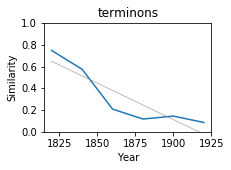

restaurateurs


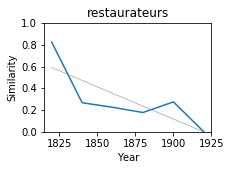

codex


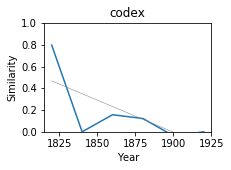

rené


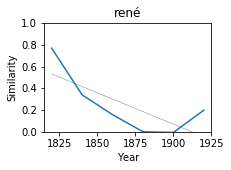

transplantation


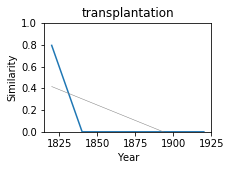

mésopotamie


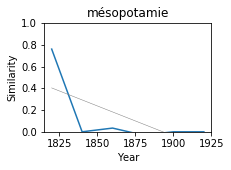

jérome


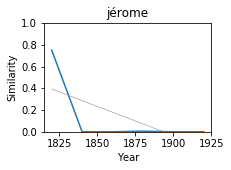

enchanteresse


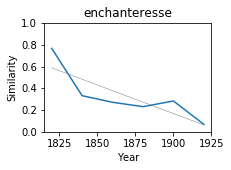

satiété


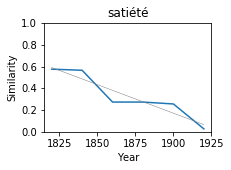

confirma


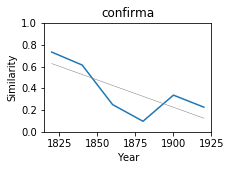

appropriée


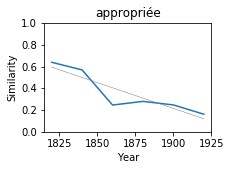

chardon


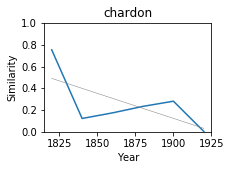

germanie


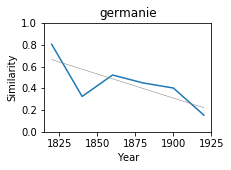

goëthe


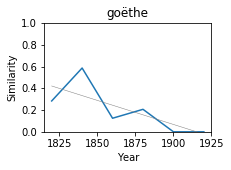

dernière


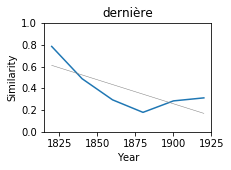

sacrée


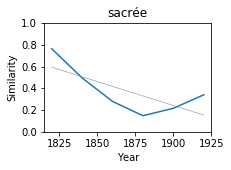

rambouillet


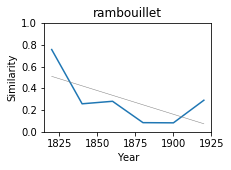

spontané


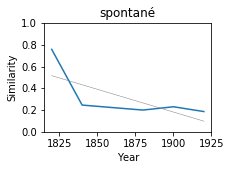

opérée


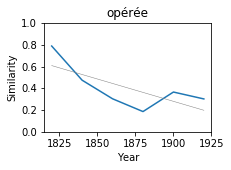

commence


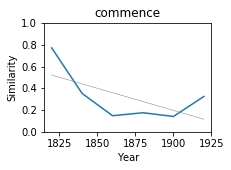

In [17]:
for i, row in df1.sort_values('slope', ascending=True).head(20).iterrows():
    plot_cosine_series('littérature', row['token'], 3, 2)

In [18]:
def intersect_neighbor_vocab(anchor, topn=1000):
    
    vocabs = []
    
    for year, model in models.items():
        similar = model.most_similar(anchor, topn=topn)
        vocabs.append(set([s[0] for s in similar]))
        
    return set.intersection(*vocabs)

In [19]:
intersect_vocab = intersect_neighbor_vocab('littérature')

In [20]:
data = []
for token in intersect_vocab:
    
    series = cosine_series('littérature', token)
    fit = lin_reg(series)
    
    data.append((token, fit.params[1], fit.pvalues[1]))

In [21]:
import pandas as pd

df2 = pd.DataFrame(data, columns=('token', 'slope', 'p'))

# Intersected neighbors

In [22]:
df2.sort_values('slope', ascending=False)

,token,slope,p
92,culture,0.001096,0.097617
13,conception,0.000928,0.381655
31,tradition,0.000890,0.041744
131,formation,0.000670,0.313773
174,critique,0.000624,0.148942
44,chimie,0.000363,0.711990
46,doctrine,0.000345,0.660402
22,génération,0.000303,0.796485
111,notion,0.000228,0.794037
10,théâtre,0.000157,0.897456


culture


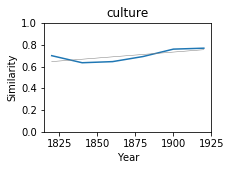

conception


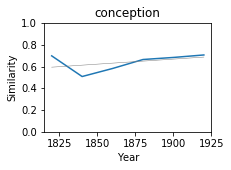

tradition


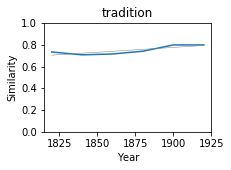

formation


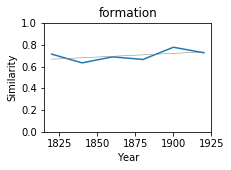

critique


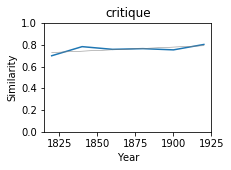

chimie


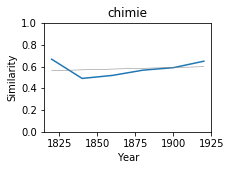

doctrine


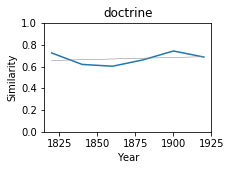

génération


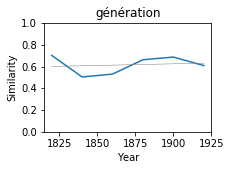

notion


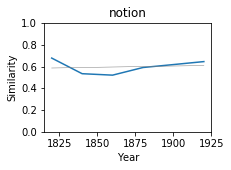

théâtre


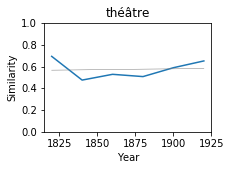

durée


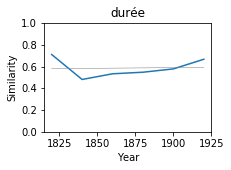

composition


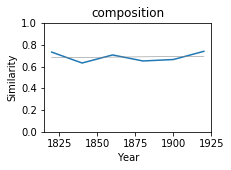

théologie


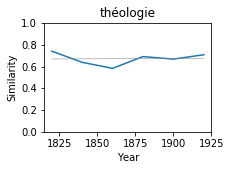

langue


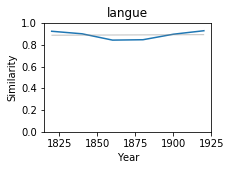

révolution


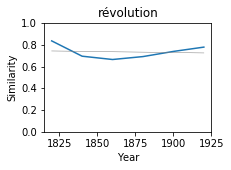

histoire


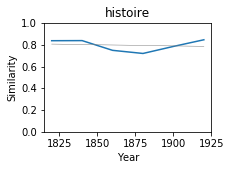

méthode


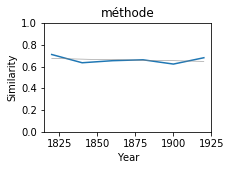

comédie


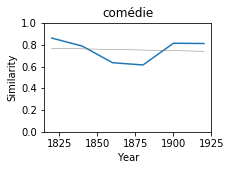

musique


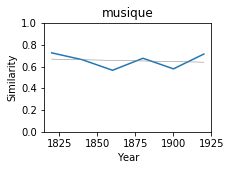

création


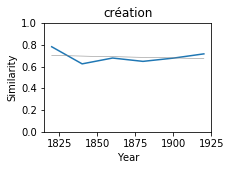

philosophie


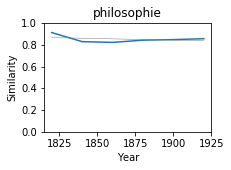

tragédie


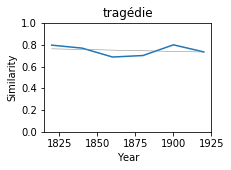

revue


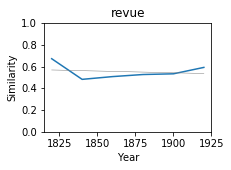

france


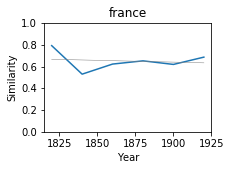

théorie


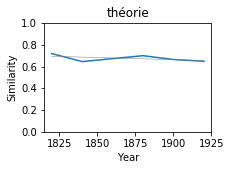

école


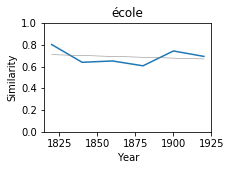

république


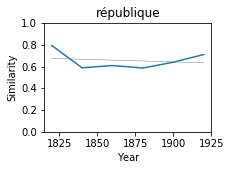

science


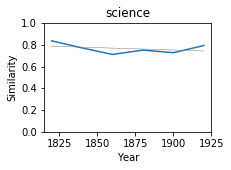

communauté


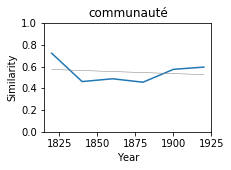

construction


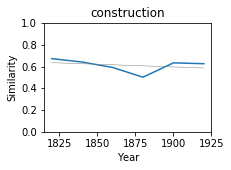

civilisation


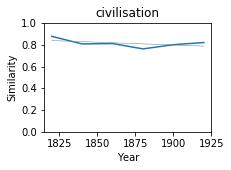

recherche


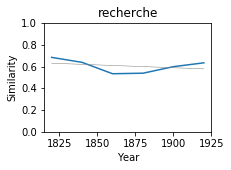

mémoire


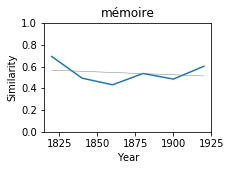

nation


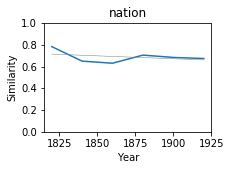

poésie


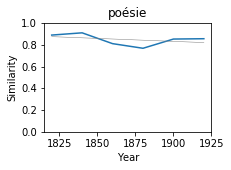

représentation


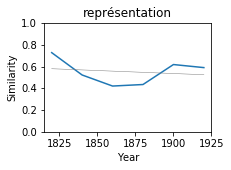

étude


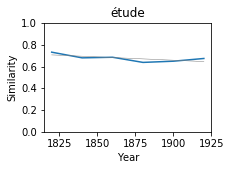

peinture


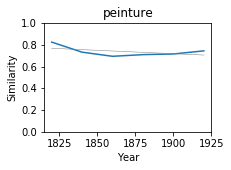

préparation


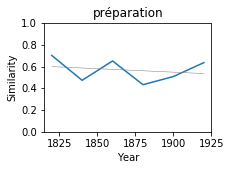

personnalité


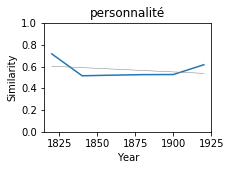

décadence


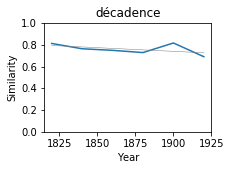

influence


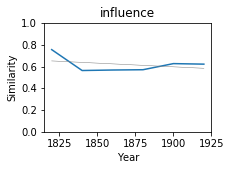

règle


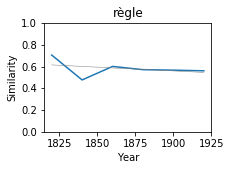

activité


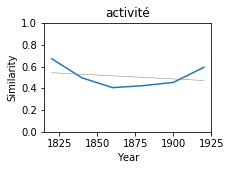

mode


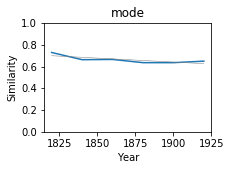

historique


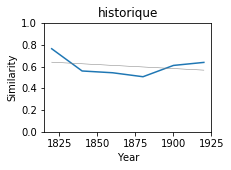

version


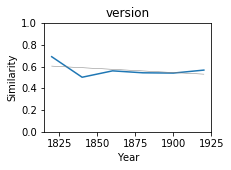

lecture


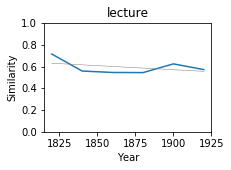

région


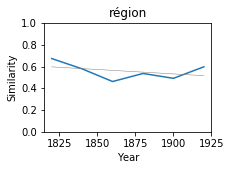

société


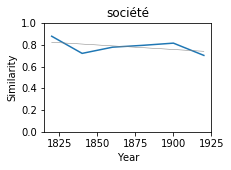

politique


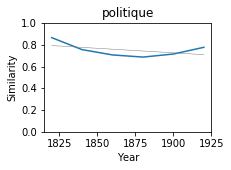

organisation


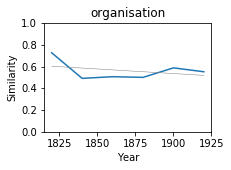

vie


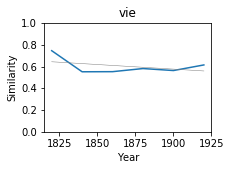

moderne


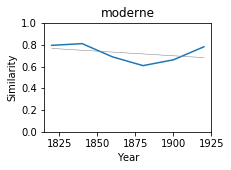

caricature


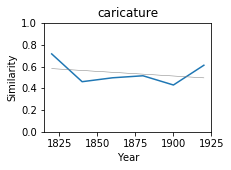

grammaire


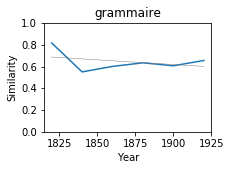

invention


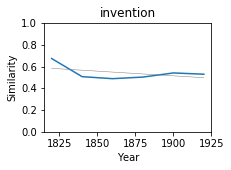

poétique


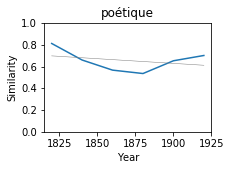

prose


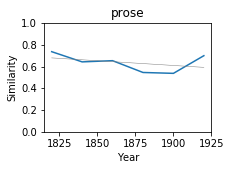

pensée


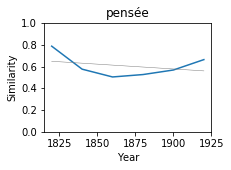

religion


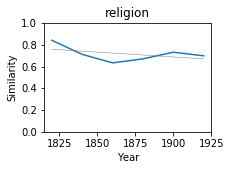

imitation


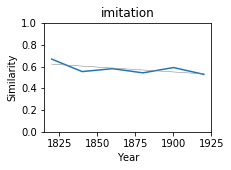

race


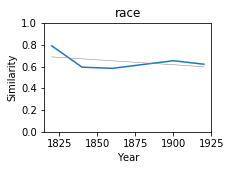

connaissance


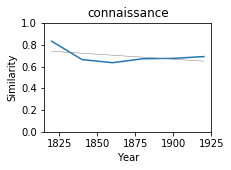

satire


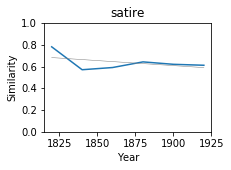

matière


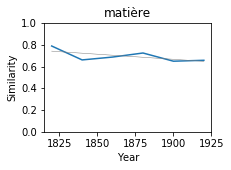

pays


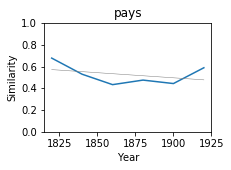

conclusion


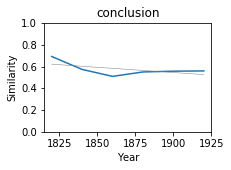

logique


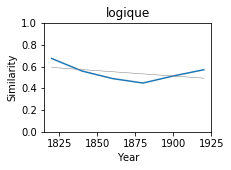

contemporaine


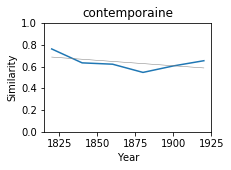

origine


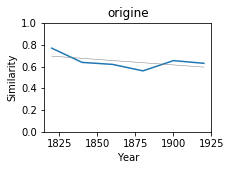

sensibilité


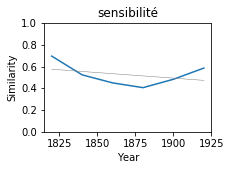

loi


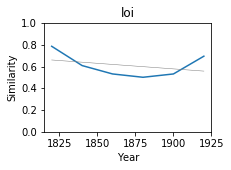

nouveauté


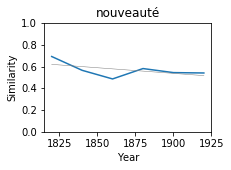

ère


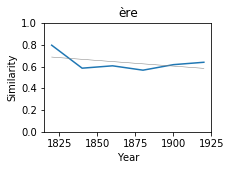

nécessité


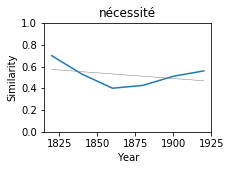

publication


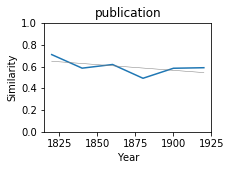

réalité


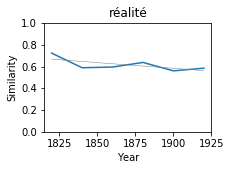

division


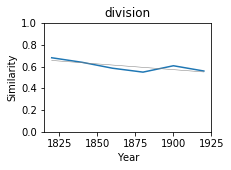

unité


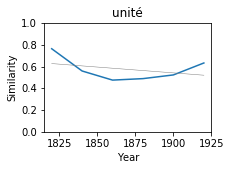

époque


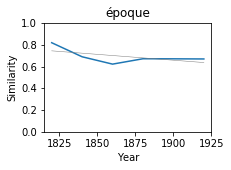

réforme


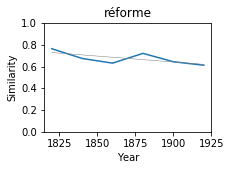

période


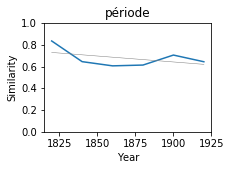

découverte


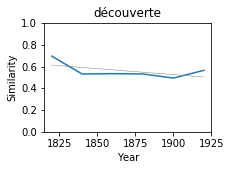

progrès


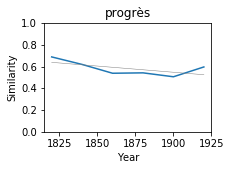

analyse


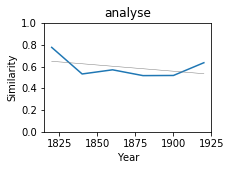

forme


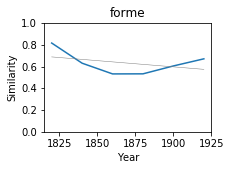

bible


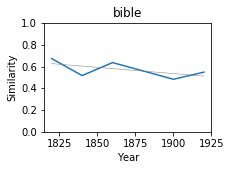

italienne


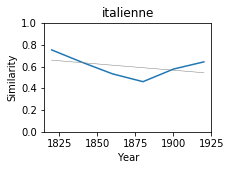

littéraire


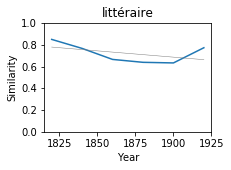

base


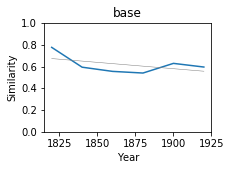

versification


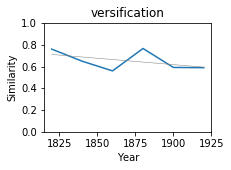

vogue


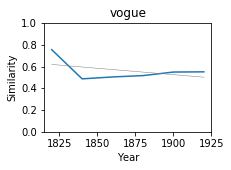

capitale


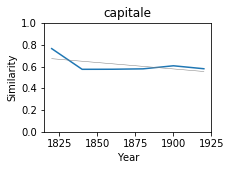

carrière


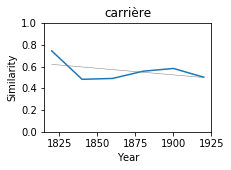

observation


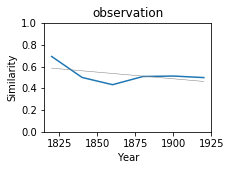

date


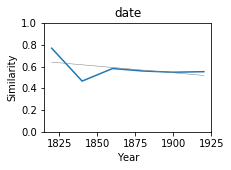

constitution


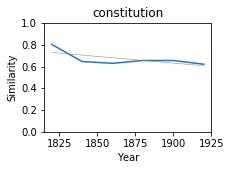

monarchie


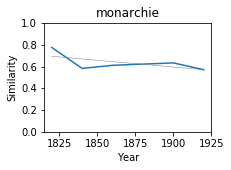

inspiration


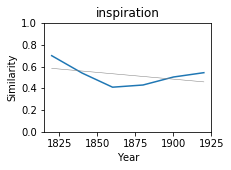

distinction


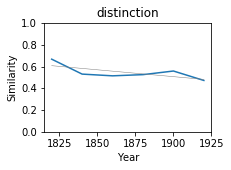

grèce


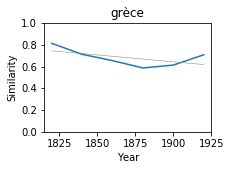

intelligence


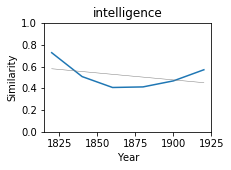

dramatique


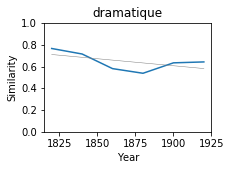

liberté


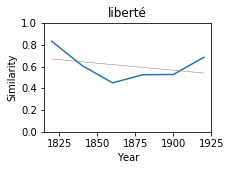

conscience


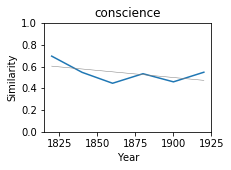

vocation


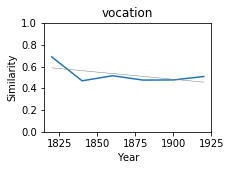

discussion


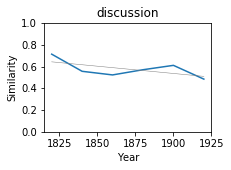

sagesse


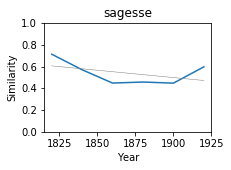

surtout


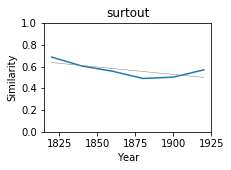

condition


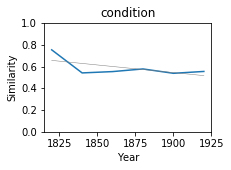

pratique


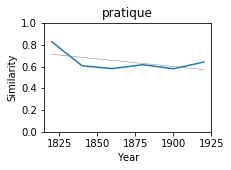

manifestation


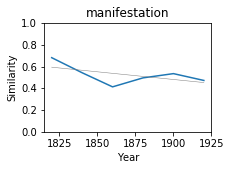

europe


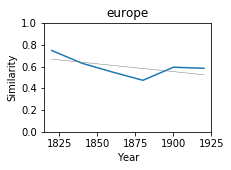

traduction


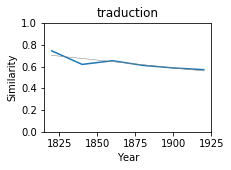

phase


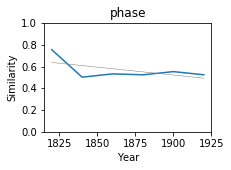

mission


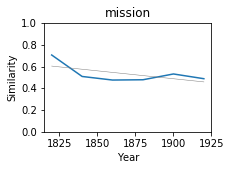

académie


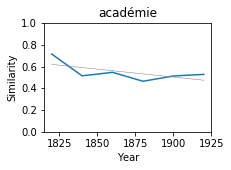

confusion


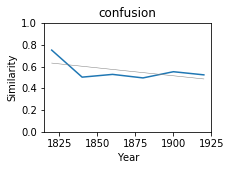

russie


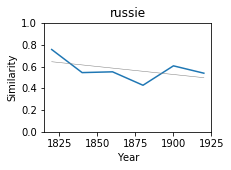

exposition


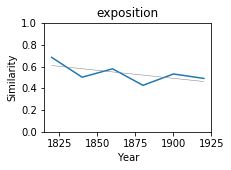

disposition


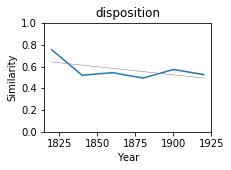

fonction


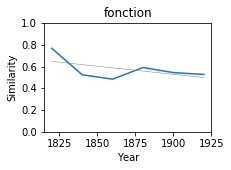

corruption


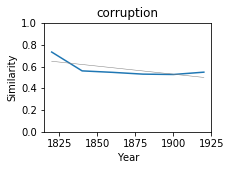

différence


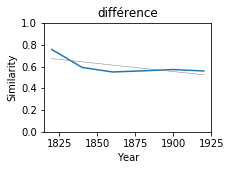

preuve


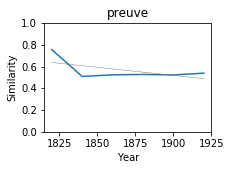

allemande


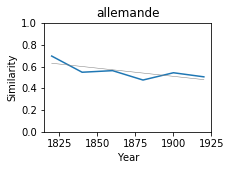

classe


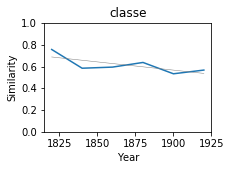

française


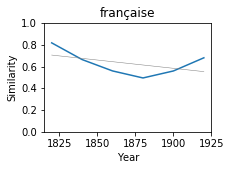

législation


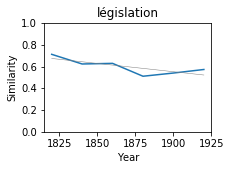

biographie


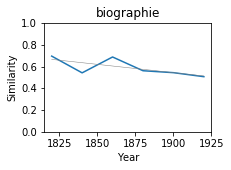

bibliothèque


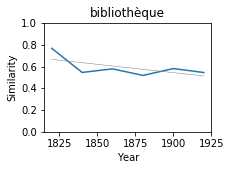

restauration


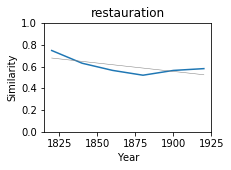

appréciation


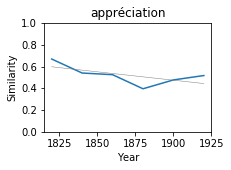

proportion


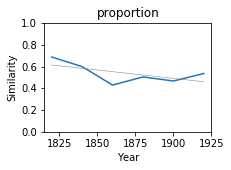

conquête


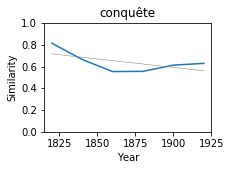

latine


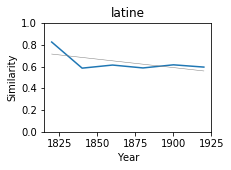

naissance


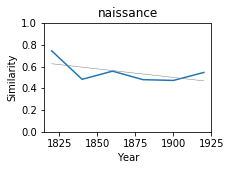

moitié


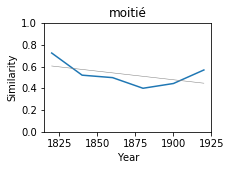

partie


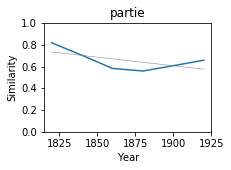

nature


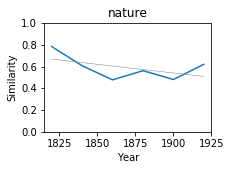

domination


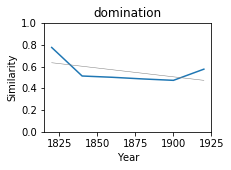

sphère


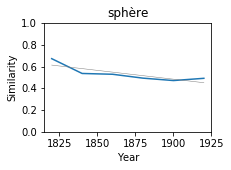

mythologie


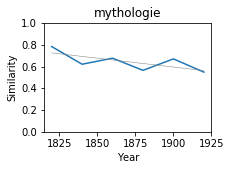

morale


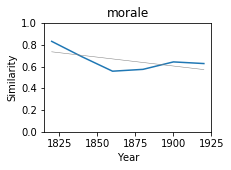

supériorité


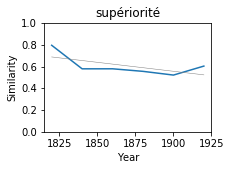

réaction


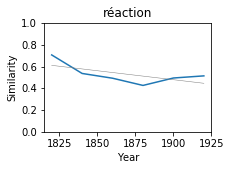

propriété


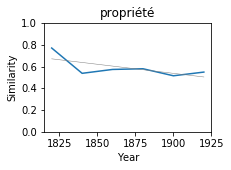

prononciation


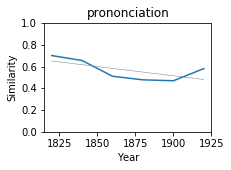

complète


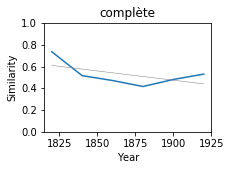

description


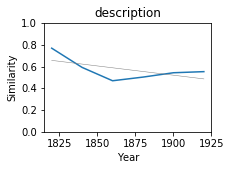

grandeur


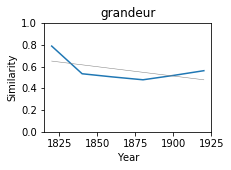

opinion


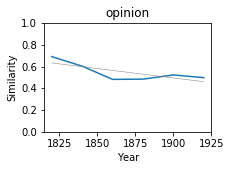

suprématie


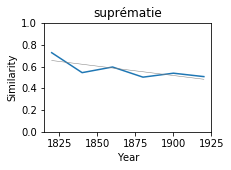

destinée


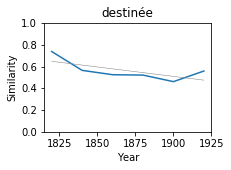

philosophique


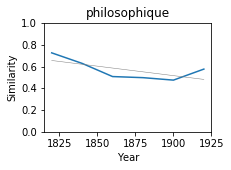

bruyère


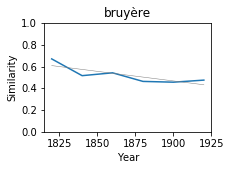

profondeur


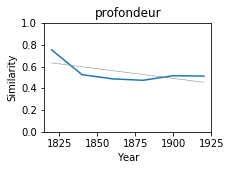

perfection


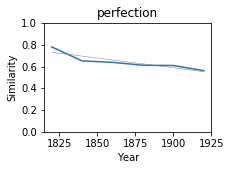

richesse


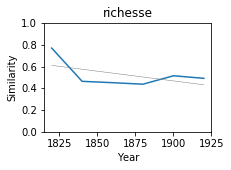

médecine


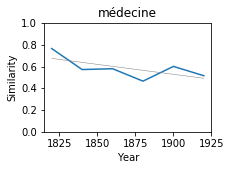

chaire


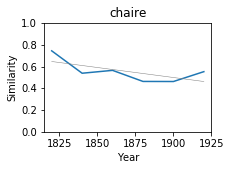

situation


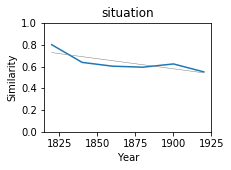

correspondance


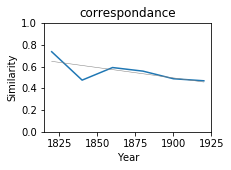

noblesse


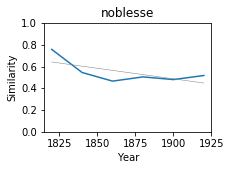

narration


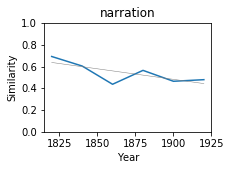

croyance


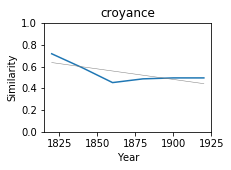

définition


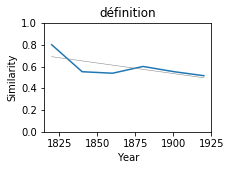

fable


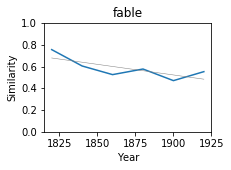

érudition


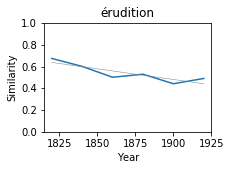

catégorie


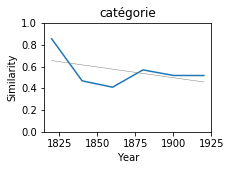

allemagne


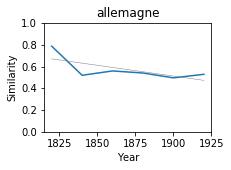

anglaise


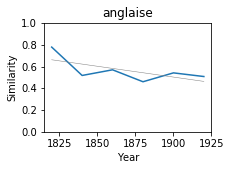

variété


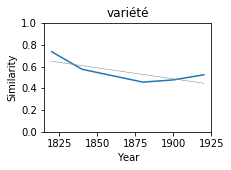

barbarie


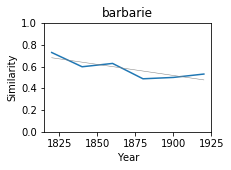

espèce


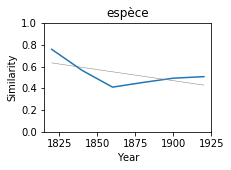

pièce


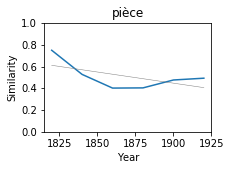

dignité


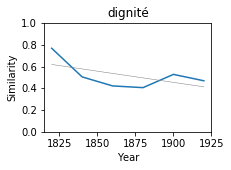

chevalerie


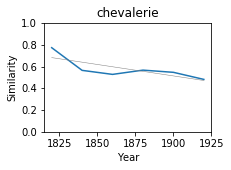

superstition


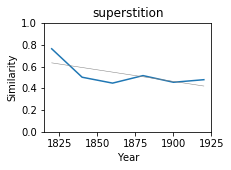

fin


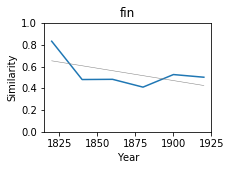

source


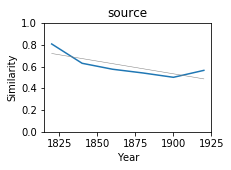

chrétienne


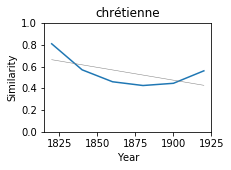

grecque


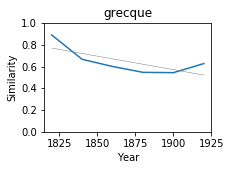

scène


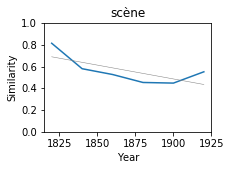

puissance


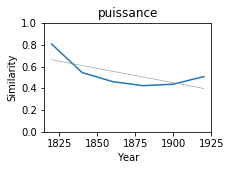

géographie


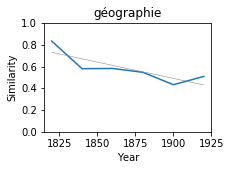

In [24]:
for i, row in df2.sort_values('slope', ascending=False).iterrows():
    plot_cosine_series('littérature', row['token'], 3, 2)